In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import os
# import pandas as pd



# import pickle

# # for BL+MS
# with open("final_weights/portfolio_value_BL_MS.pkl", "rb") as f:
#     portfolio_value_BL_MS = pickle.load(f)
# with open("final_weights/dates_BL_MS.pkl", "rb") as f:
#     dates_BL_MS = pickle.load(f)
# with open("final_weights/W_BL_MS.pkl", "rb") as f:
#     W_BL_MS = pickle.load(f)

# # for BL+MV
# with open("final_weights/portfolio_value_BL_MV.pkl", "rb") as f:
#     portfolio_value_BL_MV = pickle.load(f)  
# with open("final_weights/dates_BL_MV.pkl", "rb") as f:
#     dates_BL_MV = pickle.load(f)
# with open("final_weights/W_BL_MV.pkl", "rb") as f:
#     W_BL_MV = pickle.load(f)

# # for BL+MVO
# with open("final_weights/portfolio_value_BL_MVO.pkl", "rb") as f:
#     portfolio_value_BL_MVO = pickle.load(f)
# with open("final_weights/dates_BL_MVO.pkl", "rb") as f:
#     dates_BL_MVO = pickle.load(f)
# with open("final_weights/W_BL_MVO.pkl", "rb") as f:
#     W_BL_MVO = pickle.load(f)

# # for normal EW
# with open("final_weights/portfolio_value_normal_ew.pkl", "rb") as f:
#     portfolio_value_normal_ew = pickle.load(f)
# with open("final_weights/dates_normal_ew.pkl", "rb") as f:
#     dates_normal_ew = pickle.load(f)
# with open("final_weights/W_normal_ew.pkl", "rb") as f:
#     W_normal_ew = pickle.load(f)

# # for normal MS
# with open("final_weights/portfolio_value_normal_ms.pkl", "rb") as f:
#     portfolio_value_normal_ms = pickle.load(f)
# with open("final_weights/dates_normal_ms.pkl", "rb") as f:
#     dates_normal_ms = pickle.load(f)
# with open("final_weights/W_normal_ms.pkl", "rb") as f:
#     W_normal_ms = pickle.load(f)

# # for normal MV
# with open("final_weights/portfolio_value_normal_mv.pkl", "rb") as f:
#     portfolio_value_normal_mv = pickle.load(f)
# with open("final_weights/dates_normal_mv.pkl", "rb") as f:
#     dates_normal_mv = pickle.load(f)
# with open("final_weights/W_normal_mv.pkl", "rb") as f:
#     W_normal_mv = pickle.load(f)

# # for normal MVO
# with open("final_weights/portfolio_value_normal_mvo.pkl", "rb") as f:
#     portfolio_value_normal_mvo = pickle.load(f)
# with open("final_weights/dates_normal_mvo.pkl", "rb") as f:
#     dates_normal_mvo = pickle.load(f)
# with open("final_weights/W_normal_mvo.pkl", "rb") as f:
#     W_normal_mvo = pickle.load(f)

# # for nifty 50
# with open("final_weights/portfolio_value_nifty50.pkl", "rb") as f:
#     nifty50_portfolio = pickle.load(f)
# with open("final_weights/dates_nifty50.pkl", "rb") as f:
#     nifty50_dates = pickle.load(f)


In [143]:
import pickle

with open('portfolio_results.pkl', 'rb') as f:
    BL_MV = pickle.load(f)

with open('backtest_results.pkl', 'rb') as f:
    BL_MS = pickle.load(f)

with open('portfolio_results2.pkl', 'rb') as f:
    BL_MVO = pickle.load(f)

with open('portfolio_results_normal_ew.pkl', 'rb') as f:
    portfolio_results_normal_ew = pickle.load(f)

with open('portfolio_results_normal_ms.pkl', 'rb') as f:
    portfolio_results_normal_ms = pickle.load(f)

with open('portfolio_results_normal_mv.pkl', 'rb') as f:
    portfolio_results_normal_mv = pickle.load(f)


# 

In [144]:
with open('portfolio_value_normal_mvo.pkl', 'rb') as f:
    portfolio_results_normal_mvo = pickle.load(f)

In [148]:
portfolio_value_BL_MS, dates_BL_MS, W_BL_MS = BL_MS
portfolio_value_BL_MV, dates_BL_MV, W_BL_MV = BL_MV
portfolio_value_BL_MVO, dates_BL_MVO, W_BL_MVO = BL_MVO
portfolio_value_normal_ew, dates_normal_ew, W_normal_ew = portfolio_results_normal_ew
portfolio_value_normal_ms, dates_normal_ms, W_normal_ms = portfolio_results_normal_ms
portfolio_value_normal_mv, dates_normal_mv, W_normal_mv = portfolio_results_normal_mv

portfolio_value_normal_mvo = portfolio_results_normal_mvo
dates_normal_mvo =  dates_normal_mv


In [149]:
portfolio_value_BL_MV = portfolio_value_BL_MV[:-1]
portfolio_value_BL_MS = portfolio_value_BL_MS[:-30-4]
portfolio_value_BL_MVO = portfolio_value_BL_MVO[:-1]

dates_BL_MS = dates_BL_MS[:-30-4]
dates_BL_MV = dates_BL_MV[:-1]
dates_BL_MVO = dates_BL_MVO[:-1]

In [150]:
len(portfolio_value_BL_MV), len(portfolio_value_BL_MS), len(portfolio_value_BL_MVO), len(portfolio_value_normal_ew), len(portfolio_value_normal_ms), len(portfolio_value_normal_mv), len(portfolio_value_normal_mvo)

(1697, 1697, 1697, 1697, 1697, 1697, 1697)

In [151]:
len(portfolio_value_normal_mvo),len(dates_normal_mvo),len(dates_BL_MV),len(dates_BL_MS),len(dates_BL_MVO),len(dates_normal_ew),len(dates_normal_ms)

(1697, 1697, 1697, 1697, 1697, 1697, 1697)

In [ ]:
dates_normal_mvo[-1]

In [152]:
# Cell 8
risk_free_rate = 0.065  # Risk free rate
from sklearn.covariance import LedoitWolf  # Import Ledoit-Wolf

def get_annualized_returns(portfolio_value):
    return (portfolio_value[-1] / portfolio_value[0]) ** (252 / len(portfolio_value)) - 1

def get_sharpe_ratio(portfolio_value):
    annualized_return = (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) ** (252 / len(portfolio_value)) - 1
    returns = pd.Series(portfolio_value).pct_change().dropna()
    lw = LedoitWolf()
    cov_matrix = lw.fit(returns.values.reshape(-1, 1)).covariance_  # Use Ledoit-Wolf for covariance
    annualized_volatility = np.sqrt(cov_matrix[0, 0]) * np.sqrt(252)  # Extract volatility and annualize
    return (annualized_return - risk_free_rate) / annualized_volatility

def get_sortino_ratio(portfolio_value):
    annualized_return = (portfolio_value.iloc[-1] / portfolio_value.iloc[0]) ** (252 / len(portfolio_value)) - 1
    returns = pd.Series(portfolio_value).pct_change().dropna()
    downside_returns = returns[returns < 0]
    lw = LedoitWolf()
    cov_matrix = lw.fit(downside_returns.values.reshape(-1, 1)).covariance_  # Use Ledoit-Wolf for downside covariance
    downside_volatility = np.sqrt(cov_matrix[0, 0]) * np.sqrt(252)  # Extract downside volatility and annualize
    return (annualized_return - risk_free_rate) / downside_volatility

def get_max_drawdown(portfolio_value):
    drawdown =  []
    peak = portfolio_value[0]
    for i in range(len(portfolio_value)):
        if portfolio_value[i] >= peak:
            peak = portfolio_value[i]
            drawdown.append(0)
        else:
            drawdown.append((portfolio_value[i] - peak) / peak)
    return drawdown

def get_volatility(portfolio_value):
    returns = pd.Series(portfolio_value).pct_change().dropna()
    lw = LedoitWolf()
    cov_matrix = lw.fit(returns.values.reshape(-1, 1)).covariance_  # Use Ledoit-Wolf for covariance
    return np.sqrt(cov_matrix[0, 0]) * np.sqrt(252)  # Extract volatility and annualize

def calculate_yearly_metrics(portfolio_values, dates):
    # Convert to DataFrame with dates as index
    df = pd.DataFrame({
        'portfolio_value': portfolio_values,
        'date': pd.to_datetime(dates)
    }).set_index('date')
    
    # Group by year
    yearly_groups = df.groupby(df.index.year)
    
    results = []
    
    for year, group in yearly_groups:
        if len(group) < 5:  # Skip partial years with insufficient data
            continue
            
        annual_return = get_annualized_returns(group['portfolio_value'])
        sharpe = get_sharpe_ratio(group['portfolio_value'])
        sortino = get_sortino_ratio(group['portfolio_value'])
        max_drawdown = min(get_max_drawdown(group['portfolio_value'])) * 100  # as percentage
        volatility = get_volatility(group['portfolio_value'])
        
        results.append({
            'Year': year,
            'Annual Return (%)': annual_return * 100,
            'Sharpe Ratio': sharpe,
            'Sortino Ratio': sortino,
            'Max Drawdown (%)': max_drawdown,
            'Volatility (%)': volatility * 100
        })
    
    return pd.DataFrame(results).set_index('Year')

In [153]:
# make a dataframe for metrics
import numpy as np
import pandas as pd
metrics = pd.DataFrame(columns=["Sharpe Ratio", "Sortino Ratio", "Volatility"])
for i, portfolio in enumerate([portfolio_value_BL_MS, portfolio_value_BL_MV, portfolio_value_BL_MVO, portfolio_value_normal_ew, portfolio_value_normal_ms, portfolio_value_normal_mv, portfolio_value_normal_mvo]):
    portfolio_name = ["BL + MS Portfolio", "BL + MV Portfolio", "BL + MVO Portfolio", "Normal EW Portfolio", "Normal MS Portfolio", "Normal MV Portfolio", "Normal MVO Portfolio"][i]
    metrics.loc[portfolio_name, "Sharpe Ratio"] = get_sharpe_ratio(pd.Series(portfolio))
    metrics.loc[portfolio_name, "Sortino Ratio"] = get_sortino_ratio(pd.Series(portfolio))
    metrics.loc[portfolio_name, "Volatility"] = get_volatility(pd.Series(portfolio))
    metrics.loc[portfolio_name, "Annualized Returns"] = get_annualized_returns(portfolio)
    metrics.loc[portfolio_name, "Max Drawdown"] = min(get_max_drawdown(pd.Series(portfolio)))



metrics

,Sharpe Ratio,Sortino Ratio,Volatility,Annualized Returns,Max Drawdown
BL + MS Portfolio,0.615067,0.762613,0.256708,0.222893,-0.511423
BL + MV Portfolio,1.068083,1.279617,0.135946,0.210201,-0.306586
BL + MVO Portfolio,0.781773,0.901885,0.188354,0.212250,-0.373999
Normal EW Portfolio,0.70544,0.814696,0.190345,0.199277,-0.430767
Normal MS Portfolio,0.366414,0.433833,0.21159,0.142529,-0.422044
Normal MV Portfolio,1.030201,1.233211,0.13596,0.205066,-0.307884
Normal MVO Portfolio,0.644446,0.738551,0.209716,0.200150,-0.410258


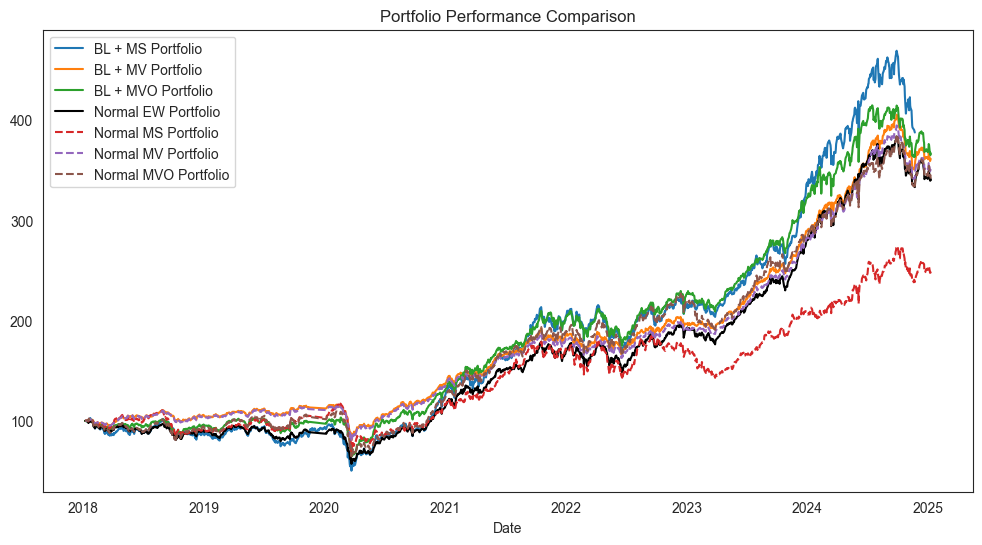

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# plt.plot(nifty50_dates, nifty50_portfolio, label='Nifty 50 Portfolio', color='black',  linewidth=2)

plt.plot(dates_BL_MS, portfolio_value_BL_MS, label='BL + MS Portfolio',  )
plt.plot(dates_BL_MV, portfolio_value_BL_MV, label='BL + MV Portfolio')
plt.plot(dates_BL_MVO, portfolio_value_BL_MVO, label='BL + MVO Portfolio')

plt.plot(dates_normal_ew, portfolio_value_normal_ew, label='Normal EW Portfolio', color= "black", linestyle='-')
plt.plot(dates_normal_ms, portfolio_value_normal_ms, label='Normal MS Portfolio', linestyle='--')
plt.plot(dates_normal_mv, portfolio_value_normal_mv, label='Normal MV Portfolio', linestyle='--')
plt.plot(dates_normal_mvo, portfolio_value_normal_mvo, label='Normal MVO Portfolio', linestyle='--')


# plt.grid()
plt.xlabel('Date')
plt.title('Portfolio Performance Comparison')
plt.legend()

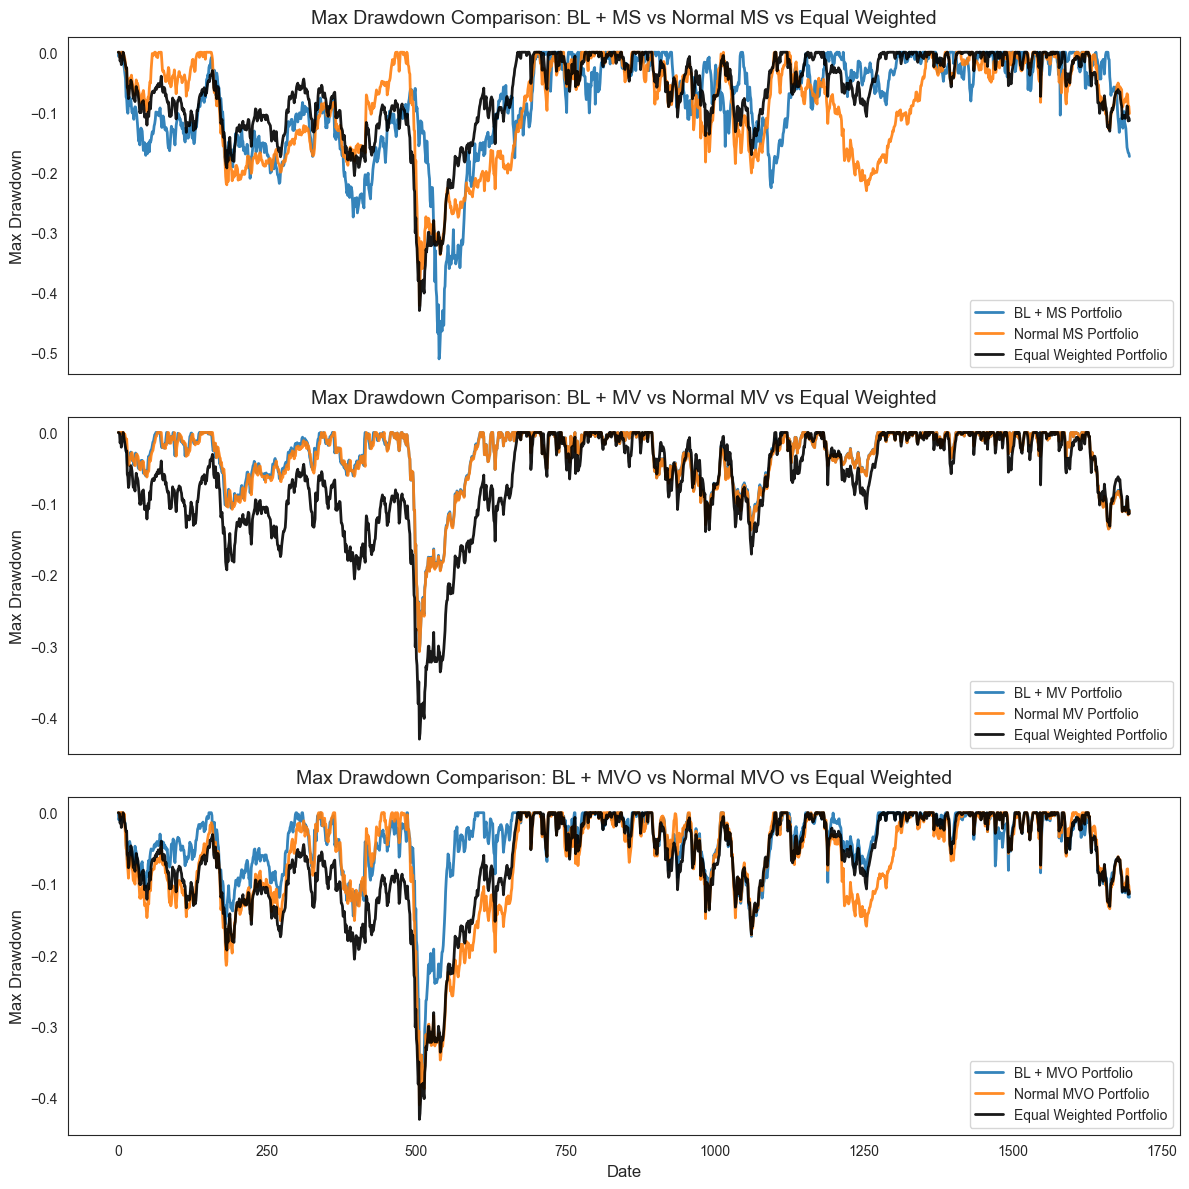

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a white/light style with no gridlines
plt.style.use('default')
sns.set_style("white")  # Switch to "white" style to remove gridlines

# Create a figure with 3 subplots that share the same x-axis
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Make sure each axis has a white face color
for ax in axes:
    ax.set_facecolor('white')

# -------------------------------
# Group 1: MS Portfolios
# -------------------------------
axes[0].plot(get_max_drawdown(portfolio_value_BL_MS), label="BL + MS Portfolio", 
             linewidth=2, linestyle='-', alpha=0.9)
axes[0].plot(get_max_drawdown(portfolio_value_normal_ms), label="Normal MS Portfolio", 
             linewidth=2, linestyle='-', alpha=0.9)
axes[0].plot(get_max_drawdown(portfolio_value_normal_ew), label="Equal Weighted Portfolio", 
             color='black', linewidth=2, linestyle='-', alpha=0.9)
axes[0].set_title("Max Drawdown Comparison: BL + MS vs Normal MS vs Equal Weighted", 
                  fontsize=14, pad=10)
axes[0].set_ylabel("Max Drawdown", fontsize=12)
# Remove gridlines by omitting grid calls
axes[0].legend(loc='lower right', fontsize=10)

# -------------------------------
# Group 2: MV Portfolios
# -------------------------------
axes[1].plot(get_max_drawdown(portfolio_value_BL_MV), label="BL + MV Portfolio", 
             linewidth=2, linestyle='-', alpha=0.9)
axes[1].plot(get_max_drawdown(portfolio_value_normal_mv), label="Normal MV Portfolio", 
             linewidth=2, linestyle='-', alpha=0.9)
axes[1].plot(get_max_drawdown(portfolio_value_normal_ew), label="Equal Weighted Portfolio", 
             color='black', linewidth=2, linestyle='-', alpha=0.9)
axes[1].set_title("Max Drawdown Comparison: BL + MV vs Normal MV vs Equal Weighted", 
                  fontsize=14, pad=10)
axes[1].set_ylabel("Max Drawdown", fontsize=12)
# Gridlines removed; no grid() call here.
axes[1].legend(loc='lower right', fontsize=10)

# -------------------------------
# Group 3: MVO Portfolios
# -------------------------------
axes[2].plot(get_max_drawdown(portfolio_value_BL_MVO), label="BL + MVO Portfolio", 
             linewidth=2, linestyle='-', alpha=0.9)
axes[2].plot(get_max_drawdown(portfolio_value_normal_mvo), label="Normal MVO Portfolio", 
             linewidth=2, linestyle='-', alpha=0.9)
axes[2].plot(get_max_drawdown(portfolio_value_normal_ew), label="Equal Weighted Portfolio", 
             color='black', linewidth=2, linestyle='-', alpha=0.9)
axes[2].set_title("Max Drawdown Comparison: BL + MVO vs Normal MVO vs Equal Weighted", 
                  fontsize=14, pad=10)
axes[2].set_ylabel("Max Drawdown", fontsize=12)
axes[2].set_xlabel("Date", fontsize=12)
# Gridlines removed; do not call grid() here.
axes[2].legend(loc='lower right', fontsize=10)

# Optimize layout to prevent overlapping elements
plt.tight_layout()
plt.show()


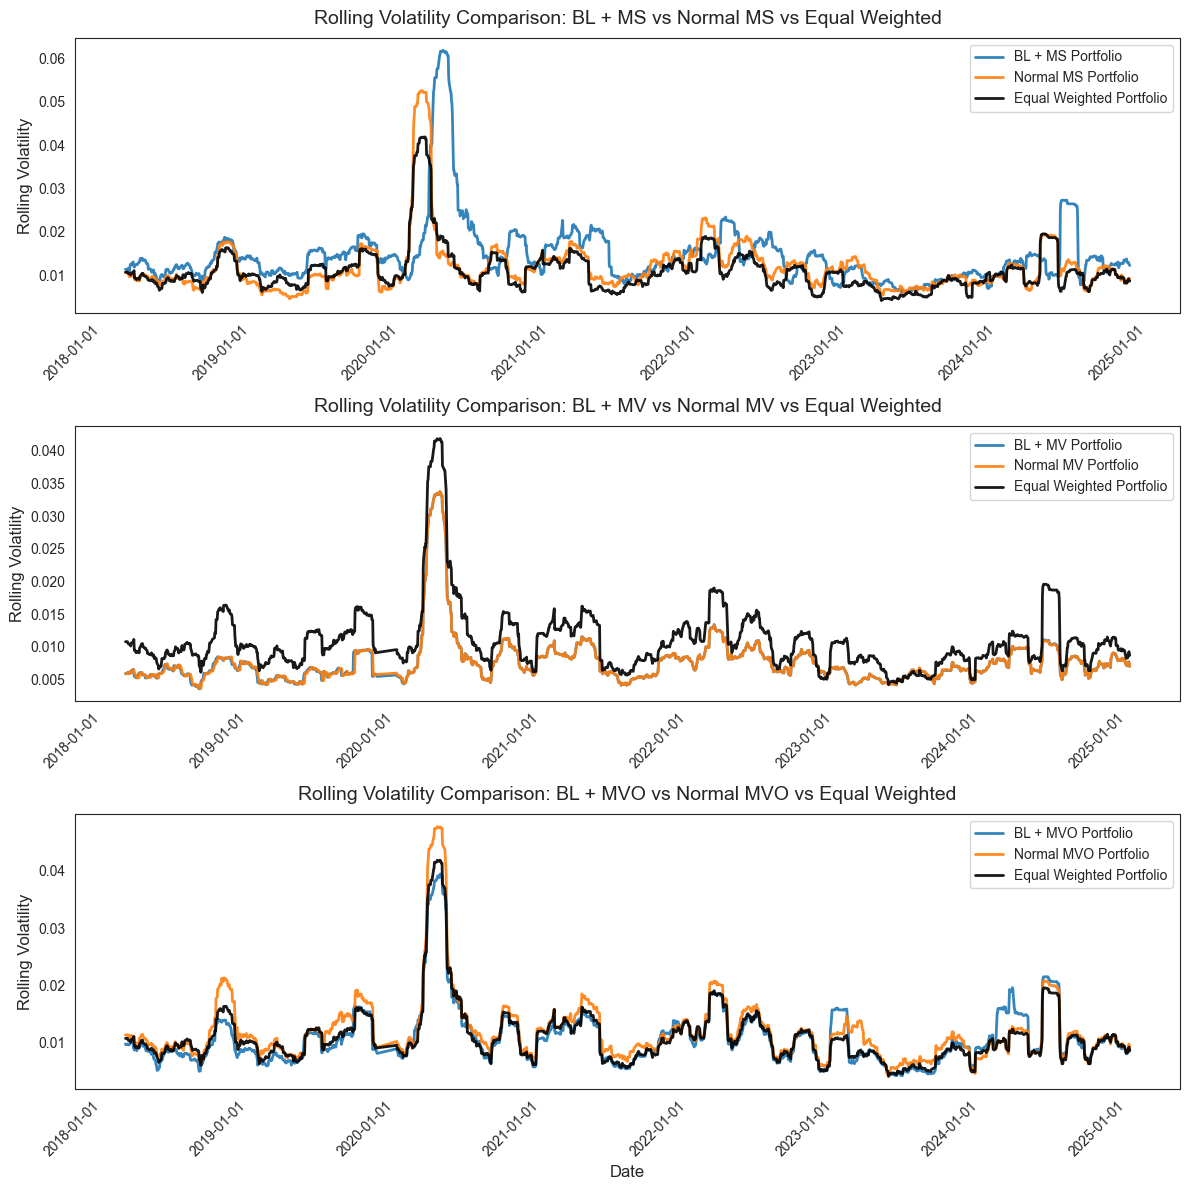

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

def get_rolling_volatility(portfolio_values, window=30):
    # Ensure the data is a Pandas Series
    if not isinstance(portfolio_values, pd.Series):
        portfolio_values = pd.Series(portfolio_values)
    
    # Calculate log returns
    returns = np.log(portfolio_values / portfolio_values.shift(1))
    
    # Compute the rolling standard deviation (volatility)
    rolling_vol = returns.rolling(window=window).std()
    
    return rolling_vol

# Use the default style to ensure a white/light background, and set style to 'white' to remove gridlines
plt.style.use('default')
sns.set_style("white")

# Create a figure with 3 subplots that share the same x-axis for consistent date display
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=False)

# Ensure each axis has a white face color
for ax in axes:
    ax.set_facecolor('white')

# -------------------------------
# Group 1: MS Portfolios
# -------------------------------
axes[0].plot(dates_BL_MS, get_rolling_volatility(portfolio_value_BL_MS), label="BL + MS Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[0].plot(dates_BL_MS, get_rolling_volatility(portfolio_value_normal_ms), label="Normal MS Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[0].plot(dates_BL_MS, get_rolling_volatility(portfolio_value_normal_ew), label="Equal Weighted Portfolio",
             color='black', linewidth=2, linestyle='-', alpha=0.9)
axes[0].set_title("Rolling Volatility Comparison: BL + MS vs Normal MS vs Equal Weighted",
                  fontsize=14, pad=10)
axes[0].set_ylabel("Rolling Volatility", fontsize=12)
# Removed gridlines: no call to axes[0].grid()
axes[0].legend(loc='upper right', fontsize=10)

# Format the x-axis to show dates for Group 1
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right")

# -------------------------------
# Group 2: MV Portfolios
# -------------------------------
axes[1].plot(dates_BL_MV, get_rolling_volatility(portfolio_value_BL_MV), label="BL + MV Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[1].plot(dates_BL_MV, get_rolling_volatility(portfolio_value_normal_mv), label="Normal MV Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[1].plot(dates_BL_MV, get_rolling_volatility(portfolio_value_normal_ew), label="Equal Weighted Portfolio",
             color='black', linewidth=2, linestyle='-', alpha=0.9)
axes[1].set_title("Rolling Volatility Comparison: BL + MV vs Normal MV vs Equal Weighted",
                  fontsize=14, pad=10)
axes[1].set_ylabel("Rolling Volatility", fontsize=12)
# Removed gridlines: no call to axes[1].grid()
axes[1].legend(loc='upper right', fontsize=10)

# Format the x-axis to show dates for Group 2
axes[1].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right")

# -------------------------------
# Group 3: MVO Portfolios
# -------------------------------
axes[2].plot(dates_BL_MVO, get_rolling_volatility(portfolio_value_BL_MVO), label="BL + MVO Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[2].plot(dates_BL_MVO, get_rolling_volatility(portfolio_value_normal_mvo), label="Normal MVO Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[2].plot(dates_BL_MVO, get_rolling_volatility(portfolio_value_normal_ew), label="Equal Weighted Portfolio",
             color='black', linewidth=2, linestyle='-', alpha=0.9)
axes[2].set_title("Rolling Volatility Comparison: BL + MVO vs Normal MVO vs Equal Weighted",
                  fontsize=14, pad=10)
axes[2].set_ylabel("Rolling Volatility", fontsize=12)
axes[2].set_xlabel("Date", fontsize=12)
# Removed gridlines: no call to axes[2].grid()
axes[2].legend(loc='upper right', fontsize=10)

# Format the x-axis to show dates for Group 3
axes[2].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(axes[2].get_xticklabels(), rotation=45, ha="right")

# Optimize layout to prevent overlapping elements
plt.tight_layout()
plt.show()


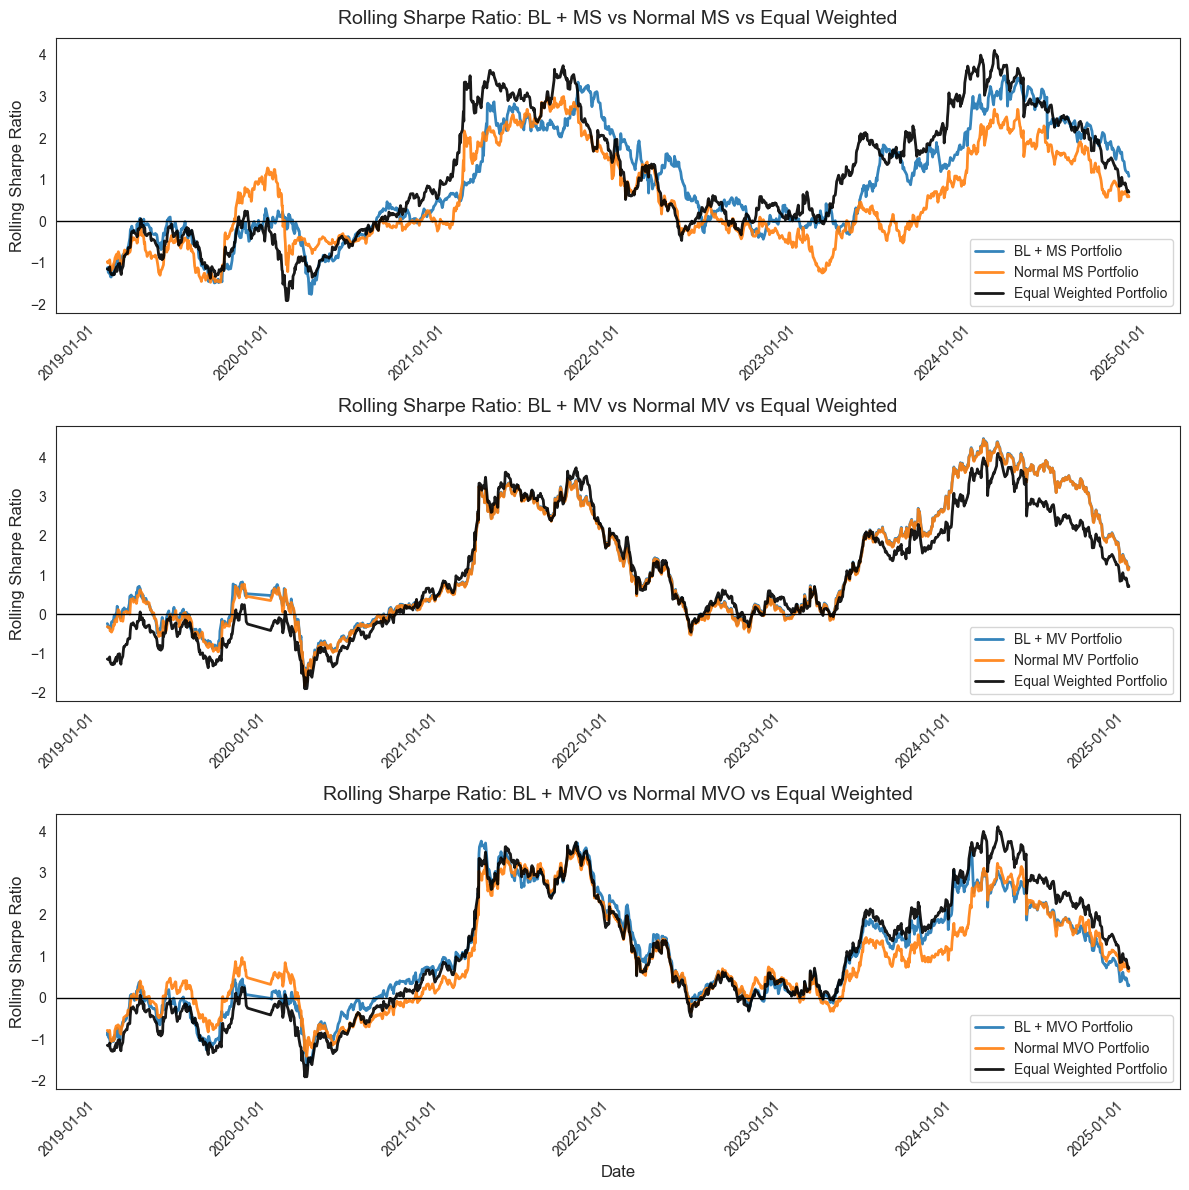

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

def get_rolling_sharpe(portfolio_values, window=252, risk_free_rate=0.065):
    # Ensure the data is a Pandas Series
    if not isinstance(portfolio_values, pd.Series):
        portfolio_values = pd.Series(portfolio_values)
    
    # Calculate logarithmic returns
    returns = np.log(portfolio_values / portfolio_values.shift(1))
    
    # Compute rolling mean and volatility (standard deviation) of returns
    rolling_mean = returns.rolling(window=window).mean()
    rolling_vol = returns.rolling(window=window).std()
    
    # Calculate rolling Sharpe ratio (assuming daily returns, annualized)
    # Subtract daily risk-free rate assuming 252 trading days per year
    daily_rf = risk_free_rate / 252
    rolling_sharpe = (rolling_mean - daily_rf) / rolling_vol
    
    # Annualize the Sharpe ratio
    rolling_sharpe_annual = rolling_sharpe * np.sqrt(252)
    
    return rolling_sharpe_annual

# Use the default style with a white/light background and set Seaborn style to "white" (no gridlines)
plt.style.use('default')
sns.set_style("white")

# Create a figure with 3 subplots that will use the provided date arrays on the x-axis
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=False)

# Ensure each axis has a white face color
for ax in axes:
    ax.set_facecolor('white')

# Choose a slightly softer black for the equal weighted portfolio (dark gray)
equal_weighted_color = 'black'  # You can adjust this color as needed

# -------------------------------
# Group 1: MS Portfolios
# -------------------------------
axes[0].plot(dates_BL_MS, get_rolling_sharpe(portfolio_value_BL_MS), label="BL + MS Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[0].plot(dates_BL_MS, get_rolling_sharpe(portfolio_value_normal_ms), label="Normal MS Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[0].plot(dates_BL_MS, get_rolling_sharpe(portfolio_value_normal_ew), label="Equal Weighted Portfolio",
             color=equal_weighted_color, linewidth=2, linestyle='-', alpha=0.9)
axes[0].axhline(0, color='black', linestyle='-', linewidth=1)  # Horizontal line at y=0
axes[0].set_title("Rolling Sharpe Ratio: BL + MS vs Normal MS vs Equal Weighted", fontsize=14, pad=10)
axes[0].set_ylabel("Rolling Sharpe Ratio", fontsize=12)
# Removed gridlines (no ax.grid() call)
axes[0].legend(loc='lower right', fontsize=10)

# Format the x-axis dates for Group 1
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right")

# -------------------------------
# Group 2: MV Portfolios
# -------------------------------
axes[1].plot(dates_BL_MV, get_rolling_sharpe(portfolio_value_BL_MV), label="BL + MV Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[1].plot(dates_BL_MV, get_rolling_sharpe(portfolio_value_normal_mv), label="Normal MV Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[1].plot(dates_BL_MV, get_rolling_sharpe(portfolio_value_normal_ew), label="Equal Weighted Portfolio",
             color=equal_weighted_color, linewidth=2, linestyle='-', alpha=0.9)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)  # Horizontal line at y=0
axes[1].set_title("Rolling Sharpe Ratio: BL + MV vs Normal MV vs Equal Weighted", fontsize=14, pad=10)
axes[1].set_ylabel("Rolling Sharpe Ratio", fontsize=12)
# Removed gridlines (no ax.grid() call)
axes[1].legend(loc='lower right', fontsize=10)

# Format the x-axis dates for Group 2
axes[1].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right")

# -------------------------------
# Group 3: MVO Portfolios
# -------------------------------
axes[2].plot(dates_BL_MVO, get_rolling_sharpe(portfolio_value_BL_MVO), label="BL + MVO Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[2].plot(dates_BL_MVO, get_rolling_sharpe(portfolio_value_normal_mvo), label="Normal MVO Portfolio",
             linewidth=2, linestyle='-', alpha=0.9)
axes[2].plot(dates_BL_MVO, get_rolling_sharpe(portfolio_value_normal_ew), label="Equal Weighted Portfolio",
             color=equal_weighted_color, linewidth=2, linestyle='-', alpha=0.9)
axes[2].axhline(0, color='black', linestyle='-', linewidth=1)  # Horizontal line at y=0
axes[2].set_title("Rolling Sharpe Ratio: BL + MVO vs Normal MVO vs Equal Weighted", fontsize=14, pad=10)
axes[2].set_ylabel("Rolling Sharpe Ratio", fontsize=12)
axes[2].set_xlabel("Date", fontsize=12)
# Removed gridlines (no ax.grid() call)
axes[2].legend(loc='lower right', fontsize=10)

# Format the x-axis dates for Group 3
axes[2].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(axes[2].get_xticklabels(), rotation=45, ha="right")

# Optimize the layout to prevent overlapping elements
plt.tight_layout()
plt.show()


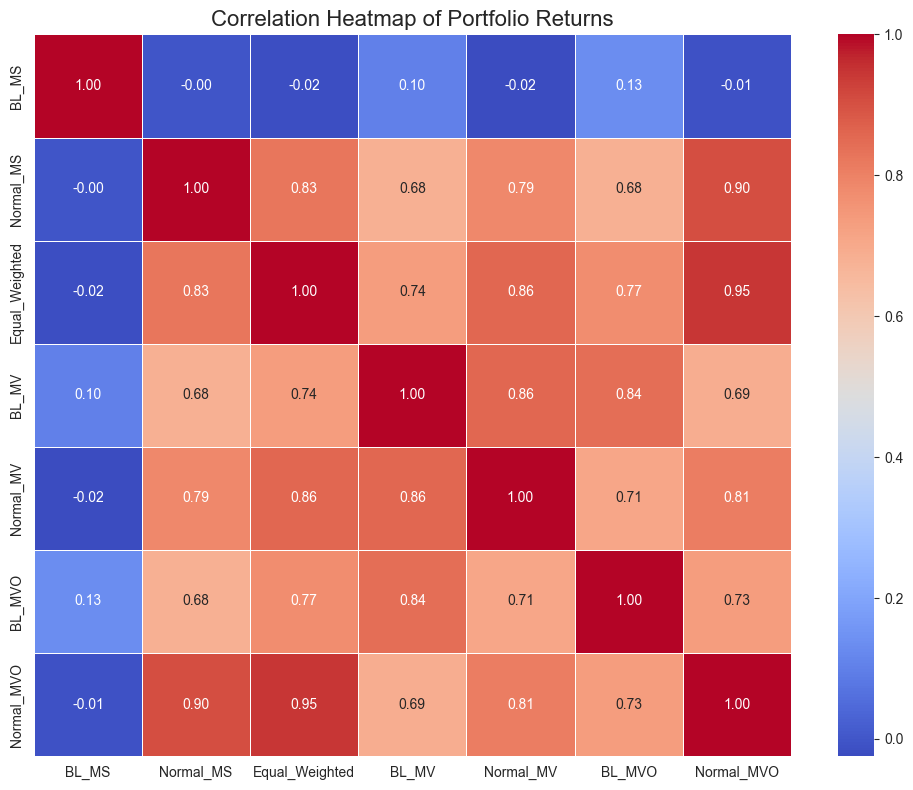

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert your list data to Pandas Series if they are not already.
# Replace these with your actual list variables.
portfolio_value_BL_MS    = pd.Series(portfolio_value_BL_MS)
portfolio_value_normal_ms = pd.Series(portfolio_value_normal_ms)
portfolio_value_normal_ew = pd.Series(portfolio_value_normal_ew)
portfolio_value_BL_MV    = pd.Series(portfolio_value_BL_MV)
portfolio_value_normal_mv = pd.Series(portfolio_value_normal_mv)
portfolio_value_BL_MVO   = pd.Series(portfolio_value_BL_MVO)
portfolio_value_normal_mvo = pd.Series(portfolio_value_normal_mvo)

# Calculate daily logarithmic returns for each portfolio.
returns_BL_MS    = np.log(portfolio_value_BL_MS / portfolio_value_BL_MS.shift(1))
returns_normal_ms = np.log(portfolio_value_normal_ms / portfolio_value_normal_ms.shift(1))
returns_normal_ew = np.log(portfolio_value_normal_ew / portfolio_value_normal_ew.shift(1))
returns_BL_MV    = np.log(portfolio_value_BL_MV / portfolio_value_BL_MV.shift(1))
returns_normal_mv = np.log(portfolio_value_normal_mv / portfolio_value_normal_mv.shift(1))
returns_BL_MVO   = np.log(portfolio_value_BL_MVO / portfolio_value_BL_MVO.shift(1))
returns_normal_mvo = np.log(portfolio_value_normal_mvo / portfolio_value_normal_mvo.shift(1))

# Combine the returns series into one DataFrame.
df_returns = pd.DataFrame({
    'BL_MS': returns_BL_MS,
    'Normal_MS': returns_normal_ms,
    'Equal_Weighted': returns_normal_ew,
    'BL_MV': returns_BL_MV,
    'Normal_MV': returns_normal_mv,
    'BL_MVO': returns_BL_MVO,
    'Normal_MVO': returns_normal_mvo
})

# Drop rows with NaN values produced due to shifting
df_returns.dropna(inplace=True)

# Compute the correlation matrix of daily returns
corr_matrix = df_returns.corr()

# Plot the correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Portfolio Returns", fontsize=16)
plt.tight_layout()
plt.show()


KeyError: -1

Rolling Volatility

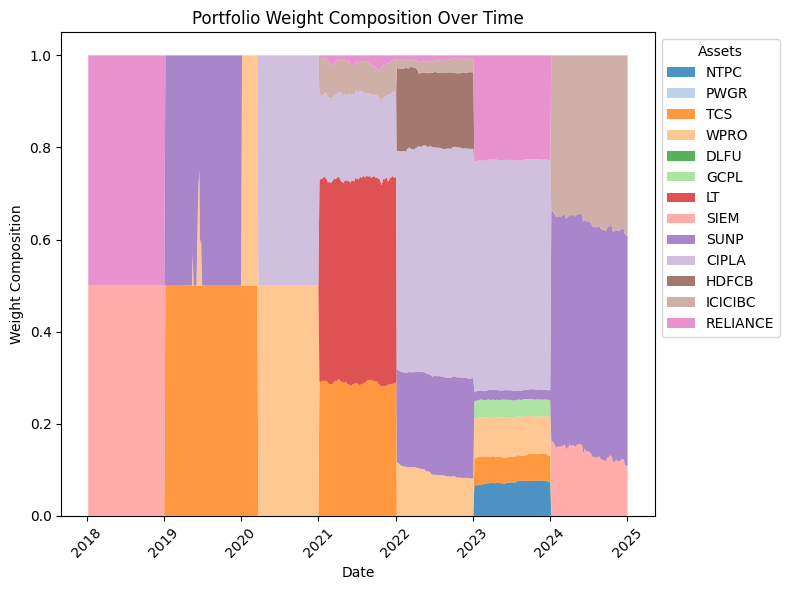

In [13]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

df = pd.DataFrame(weights, index=dates[::3][:-1])

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Use a colormap to ensure distinct colors
# 'tab20' has 20 distinct colors, good for up to 20 assets
colors = plt.cm.tab20(range(len(df.columns)))  
# If you have more than 20 assets, try 'viridis', 'plasma', or another continuous colormap
# colors = plt.cm.viridis(np.linspace(0, 1, len(df.columns)))

# Plot the stacked areas with custom colors
ax.stackplot(df.index, df.T, labels=df.columns, colors=colors, alpha=0.8)

# Formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # Format dates as years
# Uncomment the next line if you want monthly ticks instead
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  
plt.xticks(rotation=45)
plt.ylabel("Weight Composition")
plt.xlabel("Date")

# Show legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Assets")
plt.title("Portfolio Weight Composition Over Time")

# Adjust layout to prevent legend overlap
plt.tight_layout()

# Display the plot
plt.show()

plt.show()

In [4]:
12/3 - 1

3.0

In [12]:
import pickle

with open('portfolio_results.pkl', 'rb') as f:
    portfolio_results = pickle.load(f)

with open('portfolio_results1.pkl', 'rb') as f:
    portfolio_results1 = pickle.load(f)

with open('portfolio_results2.pkl', 'rb') as f:
    portfolio_results2 = pickle.load(f)

with open('portfolio_results_normal_ew.pkl', 'rb') as f:
    portfolio_results_normal_ew = pickle.load(f)

with open('portfolio_results_normal_ms.pkl', 'rb') as f:
    portfolio_results_normal_ms = pickle.load(f)

with open('portfolio_results_normal_mv.pkl', 'rb') as f:
    portfolio_results_normal_mv = pickle.load(f)

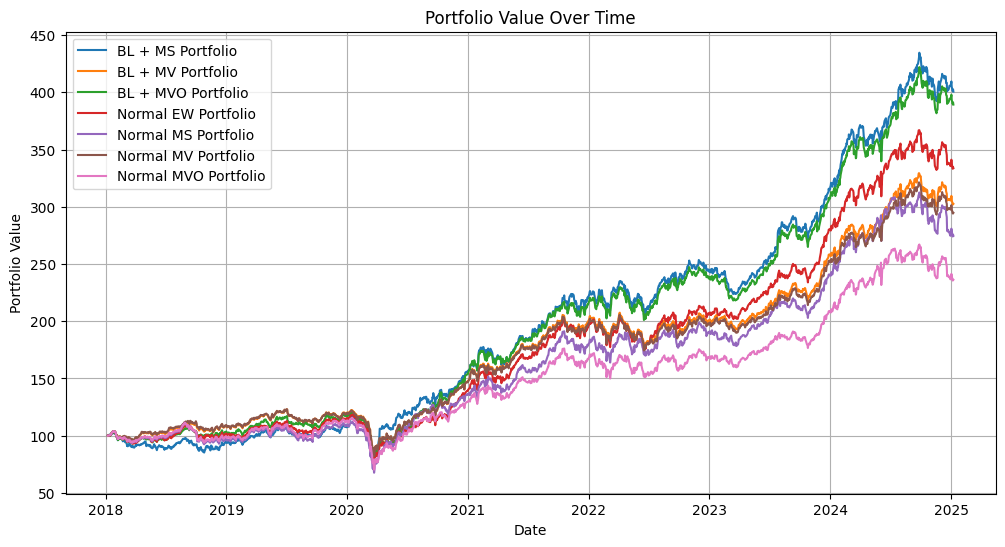

In [17]:
# plot the portfolio values for all the portfolios
plt.figure(figsize=(12, 6))
plt.plot(dates_BL_MS, portfolio_value_BL_MS, label='BL + MS Portfolio')
plt.plot(dates_BL_MV, portfolio_value_BL_MV, label='BL + MV Portfolio')
plt.plot(dates_BL_MVO, portfolio_value_BL_MVO, label='BL + MVO Portfolio')
plt.plot(dates_normal_ew, portfolio_value_normal_ew, label='Normal EW Portfolio')
plt.plot(dates_normal_ms, portfolio_value_normal_ms, label='Normal MS Portfolio')
plt.plot(dates_normal_mv, portfolio_value_normal_mv, label='Normal MV Portfolio')
plt.plot(dates_normal_mvo, portfolio_value_normal_mvo, label='Normal MVO Portfolio')
# plt.plot(nifty50_dates, nifty50_portfolio, label='Nifty 50 Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.grid()
plt.legend()